In [114]:
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
sns.set_style("darkgrid")

In [128]:
header_row = ['word','frequency']
data = pd.read_table('../Data/CountWordsNovels.txt', sep =' ',names=header_row)
# Add plus 1 to the rank since index starts from 0
data['rank'] = data.index + 1
data.head()

,word,frequency,rank
0,i,37789,1
1,he,27976,2
2,his,27824,3
3,had,20869,4
4,you,17540,5


In [156]:
a = 1
b = 1
c = 100

In [157]:
def zipf(rank,a,b,c):
    return c * (rank + b) ** a

In [158]:
popt, pcov = curve_fit(zipf, data['rank'], data['frequency'])

In [159]:
data['freq_estimate'] = zipf(data['rank'], coeffs[0], coeffs[1], coeffs[2])

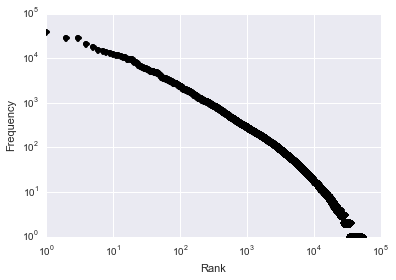

In [160]:
#plt.plot(data['rank'],data['frequency'])
#plt.plot(data['rank'], data['freq_estimate'], 'k-')
#plt.plot(data['rank'],data['frequency'],'-',data['rank'],data['freq_estimate'],'x')
plt.plot(data['rank'], data['frequency'], 'ko', label="Original Noised Data")
plt.plot(data['rank'], zipf(data['rank'], *popt), 'r-', label="Fitted Curve")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')

plt.show()

In [161]:
data.head()

,word,frequency,rank,freq_estimate
0,i,37789,1,-0.000248
1,he,27976,2,-0.143605
2,his,27824,3,-0.290252
3,had,20869,4,-0.438177
4,you,17540,5,-0.586939
